In [1]:
import sys
sys.path.append('../')
from rfoversample import RFOversample
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rfphate import RFPHATE, dataprep
from phate import PHATE


In [2]:
breast_cancer = pd.read_csv('./datasets/breast_cancer.csv')
breast_cancer

,y,thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,2,5,1,1,1,2,1,3,1,1
1,2,5,4,4,5,7,10,3,2,1
2,2,3,1,1,1,2,2,3,1,1
3,2,6,8,8,1,3,4,3,7,1
4,2,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
694,2,3,1,1,1,3,2,1,1,1
695,2,2,1,1,1,2,1,1,1,1
696,4,5,10,10,3,7,3,8,10,2
697,4,4,8,6,4,3,4,10,6,1


In [3]:
print(f" Total observations: {breast_cancer.shape[0]}")
print(breast_cancer[breast_cancer['y'] == 2].shape[0])
print(breast_cancer[breast_cancer['y'] == 4].shape[0])

 Total observations: 699
458
241


In [4]:
y = breast_cancer['y']
x = breast_cancer.drop(['y'], axis=1)

In [5]:
BCUpsample = RFOversample(breast_cancer, 'y')
x_upsampled, y_upsampled = BCUpsample.fit()

In [9]:
def Compare_RF_F1scores(n, x, y, x_upsampled, y_upsampled):
    #split data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    x_train_upsampled, x_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(x_upsampled, y_upsampled, test_size=0.33, random_state=42)
    f1_scores_original = np.zeros(n)
    f1_scores_upsampled = np.zeros(n)
    for i in range(n):
        #train, fit, and predict original points
        original_RF = RandomForestClassifier()
        original_RF.fit(x_train, y_train)
        y_pred_original = original_RF.predict(x_test)
        #train, fit, and predict upsampled points
        upsampled_RF = RandomForestClassifier()
        upsampled_RF.fit(x_train_upsampled, y_train_upsampled)
        y_pred_upsampled = upsampled_RF.predict(x_test_upsampled)
        #append f1 scores
        f1_scores_original[i] = f1_score(y_test, y_pred_original, average='weighted')
        f1_scores_upsampled[i] = f1_score(y_test_upsampled, y_pred_upsampled, average='weighted')
    return f1_scores_original, f1_scores_upsampled

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
f1_scores_original, f1_scores_upsampled = Compare_RF_F1scores(10, x, y, x_upsampled, y_upsampled)

[Text(0.5, 1.0, 'Upsampled Data')]

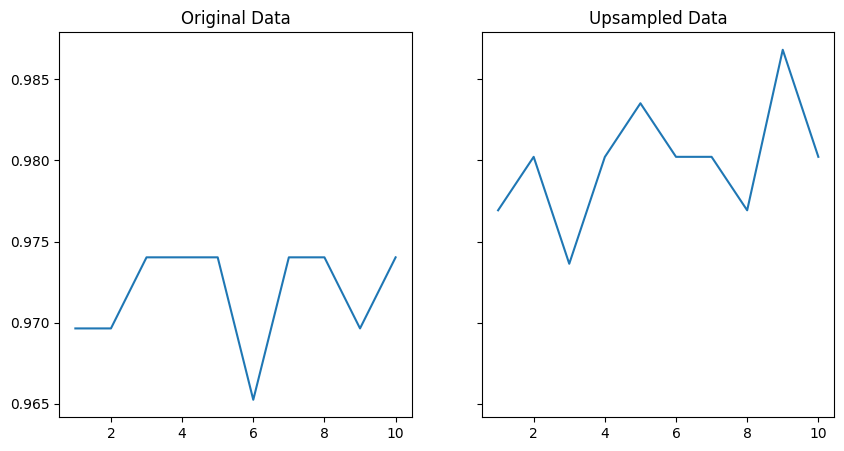

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)

ax[0].plot(range(1,11), f1_scores_original)
ax[0].set(title='Original Data')
ax[1].plot(range(1,11), f1_scores_upsampled)
ax[1].set(title='Upsampled Data')

In [25]:
y_upsampled.name = "y"
upsampled_breast_cancer = pd.concat([y_upsampled, x_upsampled], axis = 1)
upsampled_breast_cancer

,y,thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
0,2.0,5.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
1,2.0,5.000000,4.000000,4.000000,5.000000,7.000000,10.000000,3.000000,2.000000,1.000000
2,2.0,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000
3,2.0,6.000000,8.000000,8.000000,1.000000,3.000000,4.000000,3.000000,7.000000,1.000000
4,2.0,4.000000,1.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
911,4.0,6.333333,6.333333,5.666667,7.000000,3.666667,9.333333,6.000000,6.333333,2.000000
912,4.0,6.333333,5.666667,5.666667,4.000000,3.666667,7.333333,5.666667,3.000000,1.333333
913,4.0,9.000000,8.000000,7.333333,6.666667,6.333333,10.000000,8.000000,8.666667,2.000000
914,4.0,5.000000,7.000000,8.666667,9.333333,5.333333,7.000000,6.666667,9.666667,3.666667


In [29]:
print(f" Total observations: {upsampled_breast_cancer.shape[0]}")
print(upsampled_breast_cancer[upsampled_breast_cancer['y'] == 2].shape[0])
print(upsampled_breast_cancer[upsampled_breast_cancer['y'] == 4].shape[0])

 Total observations: 916
458
458


[Text(0.5, 1.0, 'Upsampled Data'), Text(0.5, 0, 'thickness')]

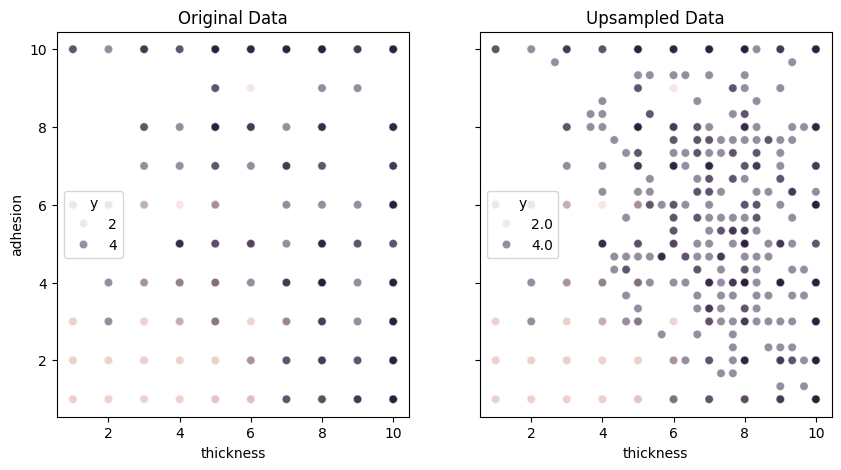

In [32]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
sns.scatterplot(data=breast_cancer, x='thickness', y='adhesion', hue='y', ax=ax[0], alpha= 0.5)
ax[0].set(title='Original Data', xlabel='thickness', ylabel='adhesion')
sns.scatterplot(data=upsampled_breast_cancer, x='thickness', y='adhesion', hue='y', ax=ax[1], alpha= 0.5)
ax[1].set(title='Upsampled Data', xlabel='thickness')

In [34]:
rfphate_original = RFPHATE(random_state=42)
rfphate_upsampled = RFPHATE(random_state=42)
phate_orignal = PHATE(random_state=42)
phate_upsampled = PHATE(random_state=42)

In [37]:
rfphate_embedding_original = rfphate_original.fit_transform(x, y)
rfphate_embedding_upsampled = rfphate_upsampled.fit_transform(x_upsampled, y_upsampled)
phate_embedding_original = phate_orignal.fit_transform(x)
phate_embedding_upsampled = phate_upsampled.fit_transform(x_upsampled)

    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.04 seconds.
  Calculating optimal t...


/yunity/bhumph1/miniconda3/envs/rfoversample-oldPandas/lib/python3.8/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 1613 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/bhumph1/miniconda3/envs/rfoversample-oldPandas/lib/python3.8/site-packages/graphtools/graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Automatically selected t = 15
  Calculated optimal t in 0.25 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.07 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.57 seconds.
Calculated PHATE in 0.96 seconds.
Calculating PHATE...
  Running PHATE on 916 observations and 9 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.05 seconds.
  Calculating optimal t...


/yunity/bhumph1/miniconda3/envs/rfoversample-oldPandas/lib/python3.8/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 1613 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/bhumph1/miniconda3/envs/rfoversample-oldPandas/lib/python3.8/site-packages/graphtools/graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Automatically selected t = 21
  Calculated optimal t in 0.41 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.10 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN


/yunity/bhumph1/miniconda3/envs/rfoversample-oldPandas/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 4.08 seconds.
Calculated PHATE in 4.66 seconds.


[Text(0.5, 1.0, 'RFPHATE Embedding on Upsampled Data')]

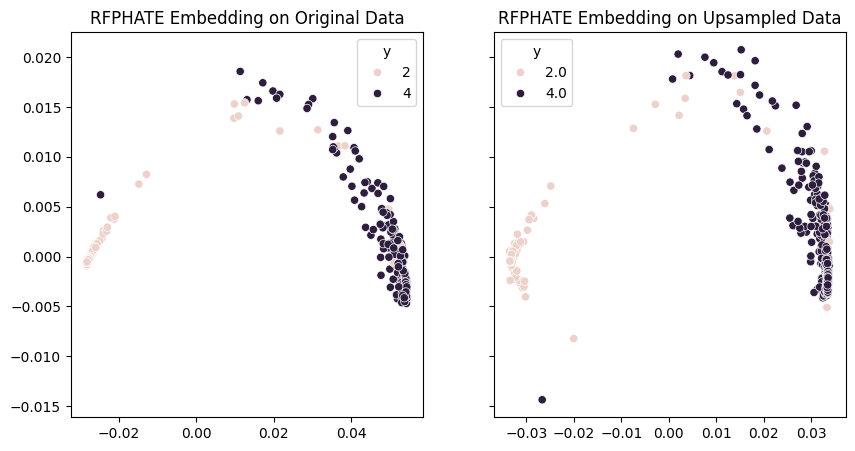

In [42]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)

sns.scatterplot(x=rfphate_embedding_original[:,0], y=rfphate_embedding_original[:,1], hue=y, ax=ax[0])
ax[0].set(title="RFPHATE Embedding on Original Data")
sns.scatterplot(x=rfphate_embedding_upsampled[:, 0], y=rfphate_embedding_upsampled[:,1], hue=y_upsampled, ax=ax[1])
ax[1].set(title="RFPHATE Embedding on Upsampled Data")

[Text(0.5, 1.0, 'PHATE Embedding on Upsampled Data')]

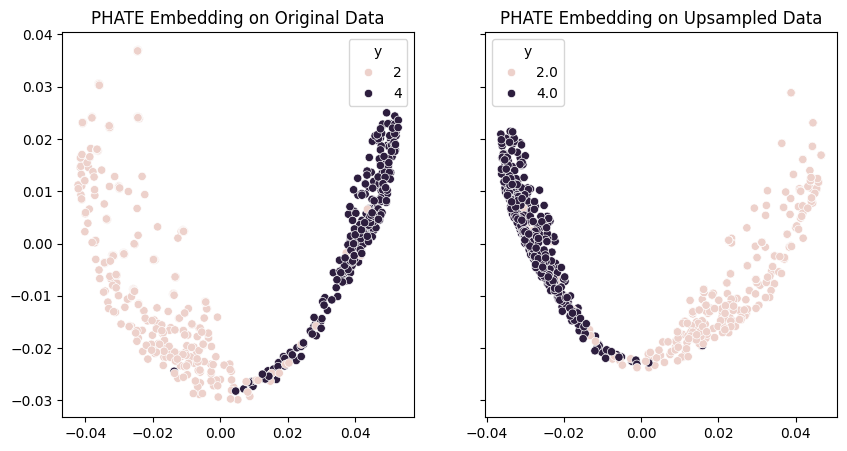

In [45]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)

sns.scatterplot(x=phate_embedding_original[:,0], y=phate_embedding_original[:,1], hue=y, ax=ax[0])
ax[0].set(title="PHATE Embedding on Original Data")
sns.scatterplot(x=phate_embedding_upsampled[:, 0], y=phate_embedding_upsampled[:,1], hue=y_upsampled, ax=ax[1])
ax[1].set(title="PHATE Embedding on Upsampled Data")

In [ ]:
#compare accuracies (f1 score)
#change rfoversample to train using class_wieght='imbalanced' in rf initialization.
#throw archetypes as minority class (also try in addition to minority class)